# WiTracing Result

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
import pandas as pd

import IPython
from IPython.display import clear_output

In [3]:
CSV_FILE = "../data/preprocessed_data.csv"
OUT_CSV_FILE = '../data/data.csv"'

In [4]:
def preprocess(df):
    df['tx'] = df['tx'].str.lower()
    df['x'] = df['x'].round(2)
    df['y'] = df['y'].round(2)
    df['z'] = df['z'].round(2)
    return df

df = pd.read_csv(CSV_FILE)
df = preprocess(df)
df

,tx,x,y,z,rssi,timestamp
0,tx1,-627.51,649.33,108.78,-48,1666162114957
1,tx2,-627.51,649.33,108.78,-77,1666162115040
2,tx3,-627.51,649.33,108.78,-45,1666162115060
3,tx4,-627.51,649.33,108.78,-42,1666162115078
4,tx5,-627.51,649.33,108.78,-75,1666162115094
...,...,...,...,...,...,...
80099,tx7,-172.92,-639.11,97.53,-59,1666163336219
80100,tx1,-179.83,-639.11,95.91,-58,1666163336239
80101,tx2,-179.83,-639.11,95.91,-52,1666163336247
80102,tx6,-179.83,-639.11,95.91,-46,1666163336265


### X-Y Coordinates for All Measurement

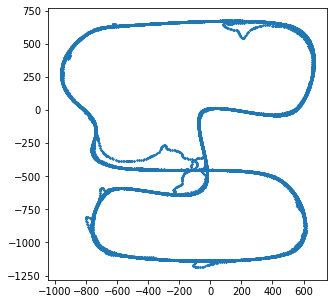

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x, df.y, s=1)
plt.show()

### X-Y Coordinates for Single TX

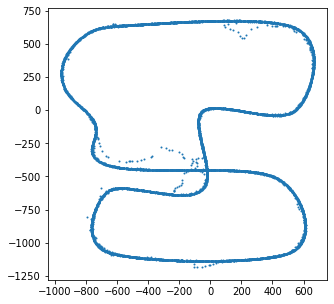

In [7]:
tx_df = df[df.tx == 'tx4']
fig = plt.figure(figsize=(5,5))
plt.scatter(tx_df.x, tx_df.y, s=1)
plt.show()

In [8]:
list(df.tx.unique())

['tx1', 'tx2', 'tx3', 'tx4', 'tx5', 'tx6', 'tx7', 'tx8', 'tx9']

### Format Raw Data

In [9]:
def formating(df):
    prev_xyz = [0,0,0]
    tx_num = len(df.tx.unique())
    columns = ['t', 'x', 'y', 'z'] + list(df.tx.unique())
    prep_df = pd.DataFrame(columns = columns)
    
    # although using concat method can significantly improve the the efficiency in this part, but we need to process one-by-one in the wi tracing system
    total = len(df)
    for num, row in df.iterrows():
        xyz = [row['x'], row['y'], row['z']]
        # if coordinate change
        index = len(prep_df.index)
        if prev_xyz != xyz:
            prep_df.loc[index] = [row['timestamp'], xyz[0], xyz[1], xyz[2]] + [-255] * tx_num
            prev_xyz = xyz
            prep_df.at[index, row['tx']] = row['rssi']
        else:
            prep_df.at[index - 1, row['tx']] = row['rssi']
        clear_output(wait=True)
        progress = round(num / total * 100, 2)
        print(f'Progress: { progress:.2f} %')
    return prep_df

In [10]:
prep_df = formating(df)
display(prep_df)

Progress: 100.00 %


,t,x,y,z,tx1,tx2,tx3,tx4,tx5,tx6,tx7,tx8,tx9
0,1.666162e+12,-627.51,649.33,108.78,-48.0,-77.0,-45.0,-42.0,-75.0,-57.0,-48.0,-41.0,-79.0
1,1.666162e+12,-627.51,649.33,101.66,-67.0,-72.0,-71.0,-42.0,-74.0,-59.0,-40.0,-41.0,-81.0
2,1.666162e+12,-616.07,648.94,93.54,-55.0,-60.0,-61.0,-50.0,-62.0,-69.0,-68.0,-56.0,-69.0
3,1.666162e+12,-606.17,647.07,95.95,-57.0,-60.0,-57.0,-49.0,-55.0,-64.0,-69.0,-61.0,-73.0
4,1.666162e+12,-590.60,643.09,99.21,-55.0,-59.0,-57.0,-50.0,-60.0,-61.0,-60.0,-57.0,-64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23443,1.666163e+12,-160.64,-639.57,97.61,-67.0,-255.0,-48.0,-255.0,-255.0,-48.0,-255.0,-255.0,-255.0
23444,1.666163e+12,-163.94,-639.61,98.24,-68.0,-56.0,-255.0,-255.0,-255.0,-43.0,-255.0,-255.0,-55.0
23445,1.666163e+12,-168.03,-639.20,98.61,-63.0,-255.0,-255.0,-255.0,-54.0,-255.0,-255.0,-60.0,-255.0
23446,1.666163e+12,-172.92,-639.11,97.53,-59.0,-255.0,-255.0,-69.0,-255.0,-255.0,-59.0,-255.0,-255.0


In [11]:
prep_df.to_csv('../data/data.csv', index=False)